# Neural Network - Backpropogation using Gradient Descent

## Goals of this notebook:

- Recap the fundamentals of Gradient Descent (GD)
- Understand Neural Network Activation Functions - tanh, Sigmoid, ReLu
- Understand the fundamentals of Feed-Forward Neural Network
- Understand the fundamentals of Backprop algorithm using Gradient Descent
- Create simple Neural Network with sample data and math expressions
- Create simple Neural Network using Python code

References:

https://github.com/Prakashvanapalli/TensorFlow/blob/master/Blogposts/Backpropogation_with_Images.ipynb

https://github.com/dennybritz/nn-from-scratch/blob/master/nn-from-scratch.ipynb

https://www.bogotobogo.com/python/python_Neural_Networks_Backpropagation_for_XOR_using_one_hidden_layer.php


## Gradient Descent (GD)

Gradient Descent is used to minimize the **cost or loss function**. In other words, we increase the accuracy of the model by iterating over the training dataset while tweaking the parameters(the weights and biases) of our model so that the error between the predicted vs. actual output is minimum. 

Analogically this can be seen as, walking down into a valley, trying to find gold(the lowest error value. Using calculus, we know that the slope of a function is the derivative of the function with respect to a value. This slope always points to the nearest valley!

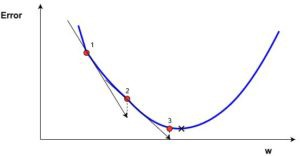

Now that we have found the direction we need to nudge the weight, we need to find how much to nudge the weight. Here, we use the Learning Rate (hyper-parameter).

The most commonly used cost function is: **Mean-Squared Error** between the predicted and actual output.

$J ( \theta ) = \frac { 1 } { m } \sum _ { i = 1 } ^ { m } \left( h _ { \theta } \left( x ^ { ( i ) } \right) - y ^ { ( i ) } \right) ^ { 2 }$


There are three variations of Gradient Descent:

- **Mini-Batch GD**: Here, instead of iterating over all training examples and with each iteration only performing computations on a single training example, we process n training examples at once. This is a good choice for very large data sets.


- **Stochastic GD**: In this, instead of using and looping over each training example, we use JUST USE ONE. There are a few things to note about this:
With every GD iteration, you need to shuffle the training set and pick a random training example from that.
Since, we are only using one training example, your path to the **local minima** will be very noisey like a drunk man after having one too many drinks.


- **Batch GD**: This is what we just discussed in the above sections. Looping over every training example, the vanilla(basic) GD.


More information can be found here: https://hackernoon.com/gradient-descent-aynk-7cbe95a778da



When using a neural network to approximate a function, the data is forwarded through the network layer-by-layer until it reaches the final layer. The final layer's activations are the predictions that the network actually makes.

The key is finding the right set of weights for all of the connections to make the right decisions (this happens in a process known as training).

The discrepancies between the outputs in the estimations and the training set data points are the principle values for our cost function.

The goal will be to get the value of this cost function as low as possible; the cost function should be more or less **convex**, like so:

<div style="width: 300px;">
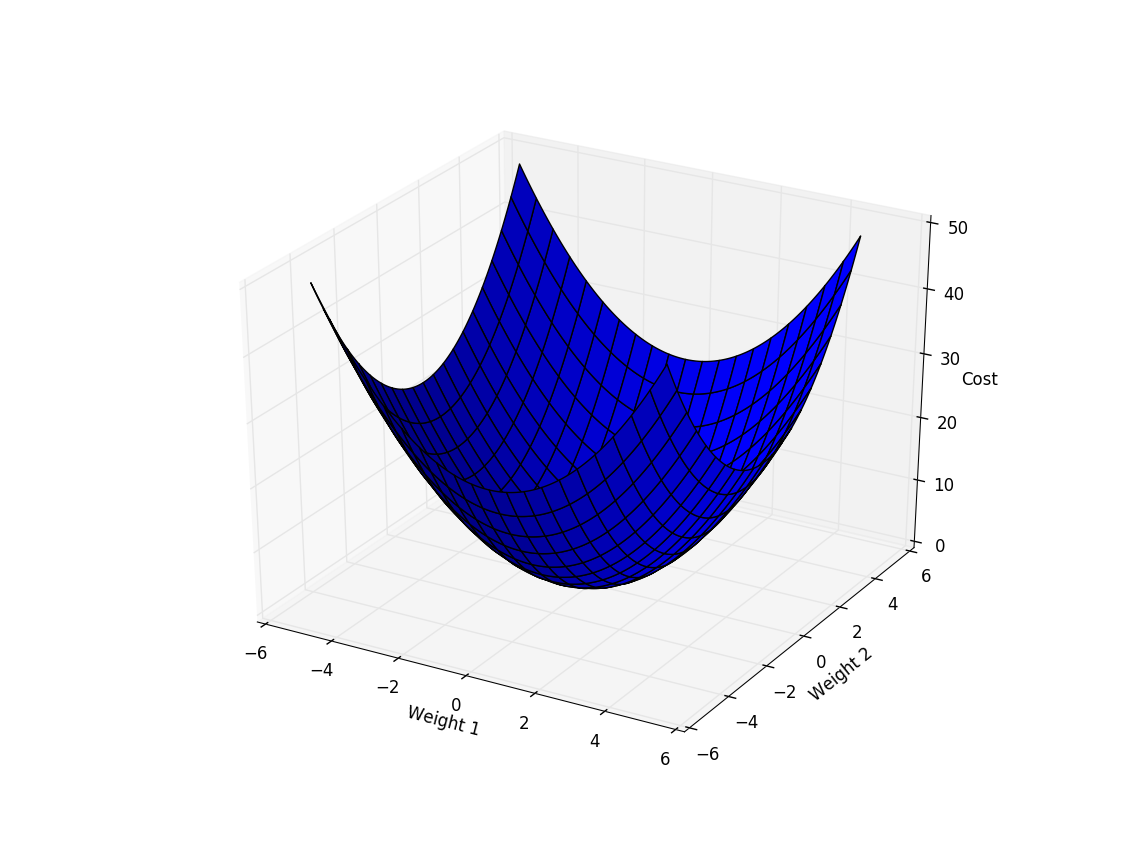
</div>

The cost function is parameterized by our network’s weights — we control our loss function by changing the weights.

We generally want to penalize larger weights, as they could lead to overfitting. If this is the case, simply adding a **regularization term** to your cost function that expresses how big your weights will mean that, in the process of training your network, it will look for a solution that has the best estimates possible while preventing overfitting.

After finding the right cost function, we need to find the weights that will make that score as low as possible. In other words, set the derivative of the cost function to zero and solve, which would give us the locations of every minimum/maximum in the function. However this process has a few **challenges**:

1. Solving the derivate of the cost function is not trivial, given our cost function is not simple
2. Neural Network with multiple layers and multiple nodes in each layer makes it much more difficult and makes the process more of black-box
3. There are lots of minimums and maximums throughout the function, and sorting out which one is the one you should be using can be computationally expensive

To scale the solution, instead, we look at a different class of algorithms, called **iterative optimization algorithms**, that progressively work their way towards the optimal solution.

The most basic of these algorithms is gradient descent. Recall that our cost function will be essentially convex, and we want to get as close as possible to the global minimum. Instead of solving for it analytically, gradient descent follows the derivatives to essentially **roll** down the slope until it finds its way to the center.

Let's take the example of a single-weight neural network, whose cost function is depicted below.

<div style="width: 200px;">
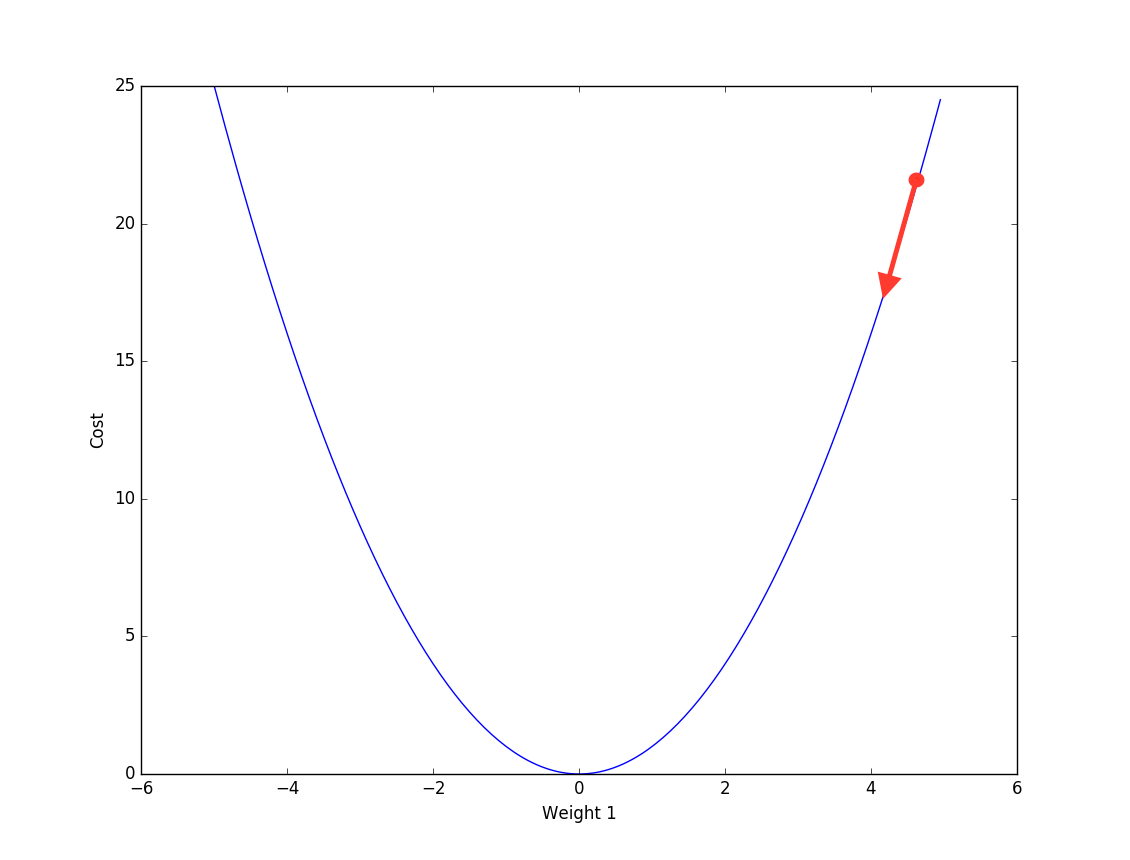
</div>

We start off by initializing our weight randomly, which puts us at the red dot on the diagram above. Taking the derivative, we see the slope at this point is a pretty big positive number. We want to move closer to the center — so naturally, we should take a pretty big step in the opposite direction of the slope.

<div style="width: 200px;">
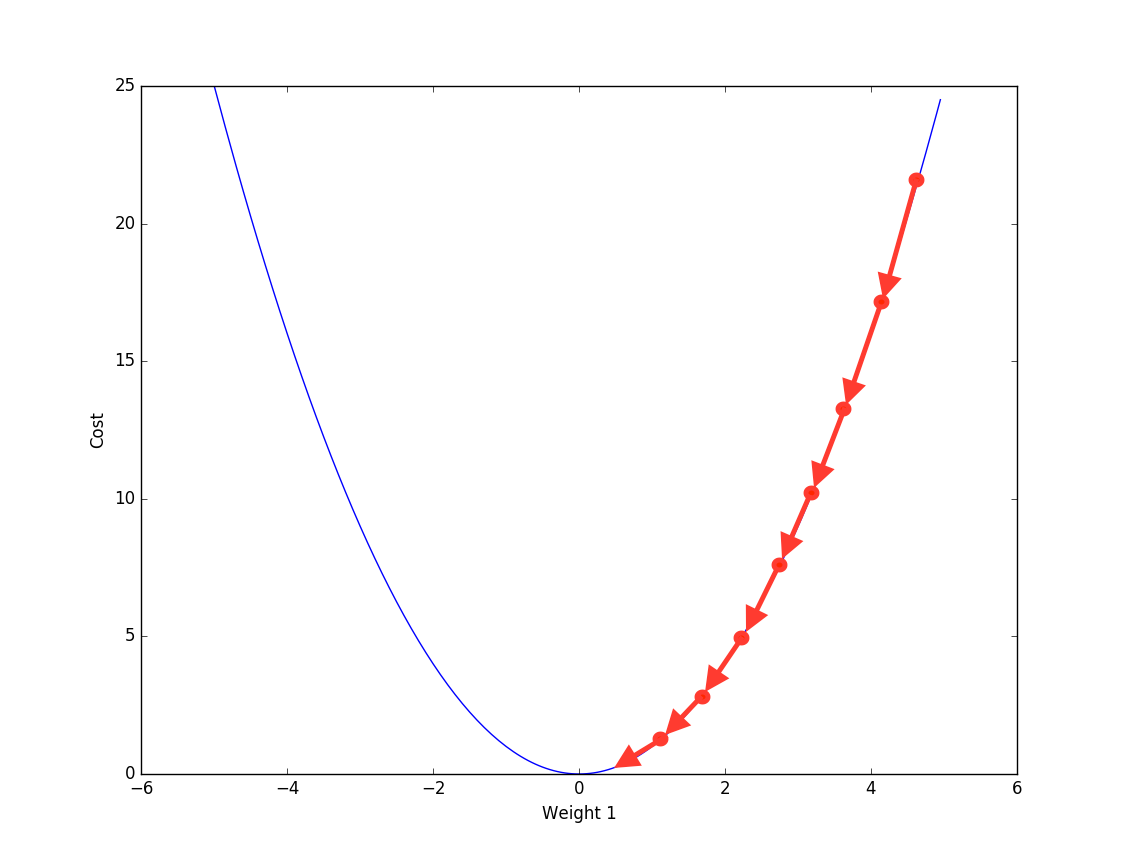
</div>

If we repeat the process enough, we soon find ourselves nearly at the bottom of our curve and much closer to the optimal weight configuration for our network.

More formally, gradient descent looks something like this:


$W : = W - \alpha \frac { \partial J } { \partial W }$

This is called **Gradient Descent Update Rule**.

Every time we want to update our weights, we subtract the derivative of the cost function w.r.t. the weight itself, scaled by a learning rate, and — that's it! We will see that as it gets closer and closer to the center, the derivative term gets smaller and smaller, converging to zero as it approaches the solution. The same process applies with networks that have tens, hundreds, thousands, or more parameters — compute the gradient of the cost function w.r.t. each of the weights, and update each of your weights accordingly.



## Backprop Algorithm

In Neural Network, the output is a composite function of the weights, inputs, and activation function(s). It is important to realize that the hidden units/nodes are simply intermediary computations that, in actuality, can be reduced down to computations of the input layer.

If we were to then take the derivative of said function with respect to some arbitrary weight (for example w1), we would iteratively apply the **chain rule**. The result would look similar to the following:

$\frac { \partial } { \partial w 1 } \text { output } = \frac { \partial } { \partial \text {hidden} 2 } \text { output } ^ { * } \frac { \partial } { \partial \text {hidden} 1 } \text { hidden } 2 * \frac { \partial } { \partial w 1 } \text { hidden }$


Now, let's attach a black box to the tail of our neural network. This black box will compute and return the error — using the cost function — from our output:


<div style="width: 400px;">
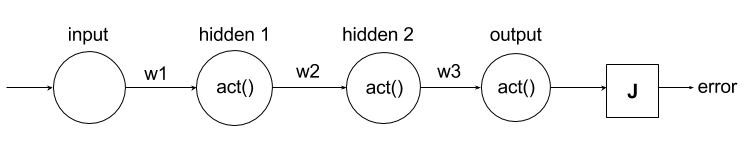
</div>


Each of these derivatives can be simplified once we choose an activation and error function, such that the entire result would represent a numerical value. At that point, any abstraction has been removed, and the error derivative can be used in gradient descent (as discussed earlier) to iteratively improve upon the weight. We compute the error derivatives w.r.t. every other weight in the network and apply gradient descent in the same way. This is backpropagation — simply the computation of derivatives that are fed to a convex optimization algorithm. We call it “backpropagation” because it almost seems as if we are traversing from the output error to the weights, taking iterative steps using chain the rule until we “reach” our weight.

<div style="width: 400px;">
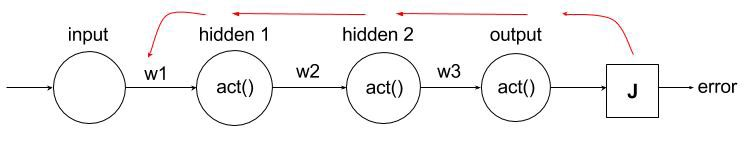
</div>

More info: https://ayearofai.com/rohan-lenny-1-neural-networks-the-backpropagation-algorithm-explained-abf4609d4f9d

## Neural Network Activation Functions

Activation Function is used to determine the output of neural network like yes or no. It maps the resulting values in between 0 to 1 or -1 to 1 etc. (depending upon the function). Activation Function can be linear or non-linear. 

There are various activations functions handling non-linear datasets. 

Three popular non-linear activation functions are: **sigmoid, tanh, ReLu and Softmax**.


More Information can be found here: https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6


### Sigmod:

The Sigmoid Function curve looks like a S-shape. The main reason why we use sigmoid function is because it exists between (0 to 1). Therefore, it is especially used for models where we have to predict the probability as an output.Since probability of anything exists only between the range of 0 and 1, sigmoid is the right choice.

The function is differentiable.That means, we can find the slope of the sigmoid curve at any two points.

The function is monotonic while its derivative is not monotonic.

The **softmax** function is a more generalized logistic activation function which is used for multiclass classification.

<div style="width: 200px;">
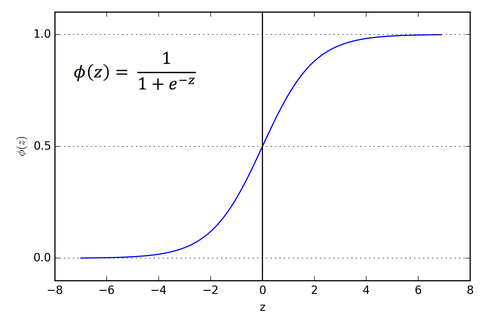
</div>


$\text { Sigmoid } = 1 / \left( 1 + \mathrm { e } ^ { - x } \right)$

$\frac { \partial \left( 1 / \left( 1 + \mathrm { e } ^ { - x } \right) \right) } { \partial x } = 1 / \left( 1 + \mathrm { e } ^ { - x } \right) \times \left( 1 - 1 / \left( 1 + \mathrm { e } ^ { - x } \right) \right)$

$\frac { \partial \text { sigmoid } } { \partial x } = \operatorname { Sigmoid } \times ( 1 - \text { Sigmoid } )$

### tanh (Hyperbolic Tangent):

tanh is also like logistic sigmoid but better. The range of the tanh function is from (-1 to 1). tanh is also sigmoidal (s - shaped).

Both tanh and logistic sigmoid activation functions are used in feed-forward nets.

<div style="width: 300px;">
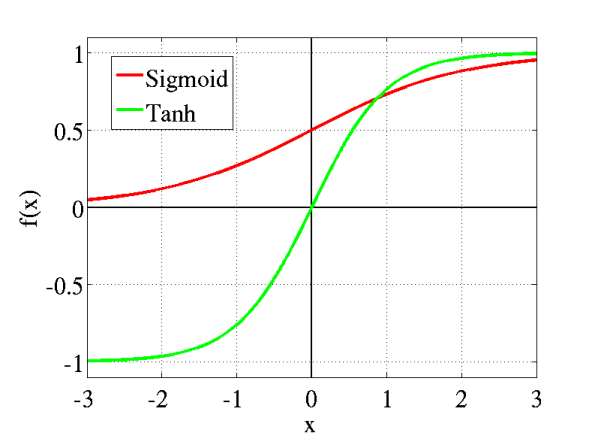
</div>


$g _ { \tanh } ( z ) = \frac { \sinh ( z ) } { \cosh ( z ) }$

$= \frac { e ^ { z } - e ^ { - z } } { e ^ { z } + e ^ { - z } }$

$g _ { \tanh } ^ { \prime } ( z ) = \frac { \partial } { \partial z } \frac { \sinh ( z ) } { \cosh ( z ) }$

$= \frac { \frac { \partial } { \partial z } \sinh ( z ) \times \cosh ( z ) - \frac { \partial } { \partial z } \cosh ( z ) \times \sinh ( z ) } { \cosh ^ { 2 } ( z ) }$

$= \frac { \cosh ^ { 2 } ( z ) - \sinh ^ { 2 } ( z ) } { \cosh ^ { 2 } ( z ) }$

$= 1 - \frac { \sinh ^ { 2 } ( z ) } { \cosh ^ { 2 } ( z ) }$

$= 1 - \tanh ^ { 2 } ( z )$


### ReLu (Rectified Linear Unit):

The ReLU is the most used activation function in the world right now.Since, it is used in almost all the convolutional neural networks or deep learning.

<div style="width: 300px;">
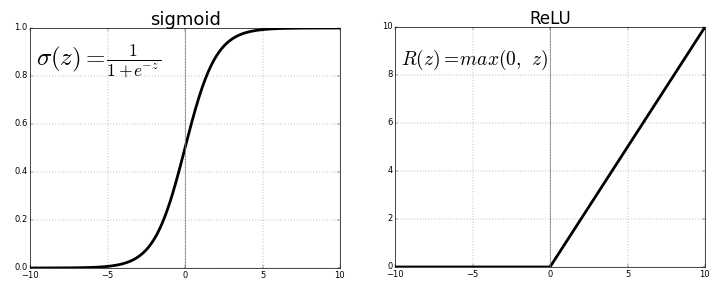
</div>

As you can see, the ReLU is half rectified (from bottom). f(z) is zero when z is less than zero and f(z) is equal to z when z is above or equal to zero.

Range: [ 0 to infinity)

The function and its derivative both are monotonic.

But the issue is that all the negative values become zero immediately which decreases the ability of the model to fit or train from the data properly. That means any negative input given to the ReLU activation function turns the value into zero immediately in the graph, which in turns affects the resulting graph by not mapping the negative values appropriately.

$r e l u = \max ( 0 , x )$

$if x > 0 , \frac { \partial ( r e l u ) } { \partial x } = 1$

$\text { Otherwise, } \frac { \partial ( r e l u ) } { \partial x } = 0$

### Softmax Operation:

The **softmax** function is a more generalized logistic activation function which is used for multiclass classification.


$\text { Softmax } = \mathrm { e } ^ { x _ { a } } / \left( \sum _ { a = 1 } ^ { n } \mathrm { e } ^ { x _ { a } } \right) = \mathrm { e } ^ { x _ { 1 } } / \left( \mathrm { e } ^ { x _ { 1 } } + \mathrm { e } ^ { x _ { 2 } } + \mathrm { e } ^ { x _ { 3 } } \right)$

$\frac { \partial ( \text {Softmax} ) } { \partial x _ { 1 } } = \left( \mathrm { e } ^ { x _ { 1 } } \times \left( \mathrm { e } ^ { x _ { 2 } } + \mathrm { e } ^ { x _ { 3 } } \right) \right) / \left( \mathrm { e } ^ { x _ { 1 } } + \mathrm { e } ^ { x _ { 2 } } + \mathrm { e } ^ { x _ { 3 } } \right) ^ { 2 }$


## Examples of Activation Functions

Taken the following sample from the following link:
https://github.com/Prakashvanapalli/TensorFlow/blob/master/Blogposts/Backpropogation_with_Images.ipynb

### Sample Network 

- one input layer, two hidden layers and one output layer, each having three (3) neurons/nodes along with the biased terms.
- 2nd hidden layer will have **ReLU** and **sigmoid** respectively as activation functions. Final layer will have **Softmax**.
- Error is calculated using **cross-entropy**.

<div style="width: 500px;">
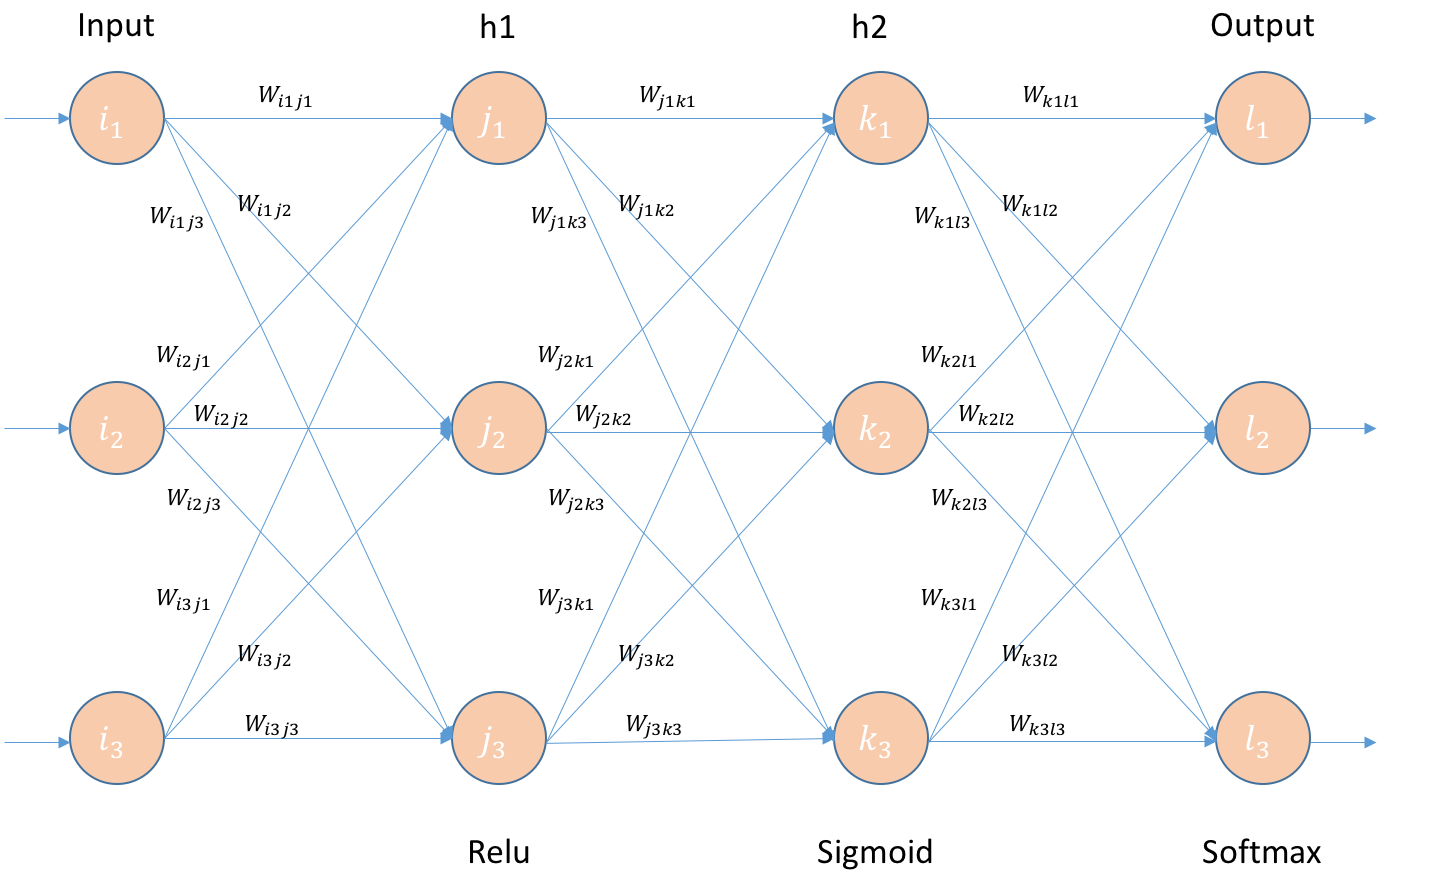
</div>

### Initialization of the network:

$\text {Input } = \left[ \begin{array} { c c c } { 0.1 } & { 0.2 } & { 0.7 } \end{array} \right]$

$W _ { i j } = \left[ \begin{array} { l l l } { W _ { i 1 j 1 } } & { W _ { i 1 j 2 } } & { W _ { i 1 j 3 } } \\ { W _ { i 2 j 1 } } & { W _ { i 2 j 2 } } & { W _ { i 2 j 3 } } \\ { W _ { i 3 j 1 } } & { W _ { i 2 j 2 } } & { W _ { i 3 j 3 } } \end{array} \right] = \left[ \begin{array} { c c c } { 0.1 } & { 0.2 } & { 0.3 } \\ { 0.3 } & { 0.2 } & { 0.7 } \\ { 0.4 } & { 0.3 } & { 0.9 } \end{array} \right]$

$W _ { j k } = \left[ \begin{array} { l l l } { W _ { j 1 k 1 } } & { W _ { j 1 k 2 } } & { W _ { j 1 k 3 } } \\ { W _ { j 2 k 1 } } & { W _ { j 2 k 2 } } & { W _ { j 2 k 3 } } \\ { W _ { j 2 k 1 } } & { W _ { j 3 k 2 } } & { W _ { j 3 k 3 } } \end{array} \right] = \left[ \begin{array} { c c c } { 0.2 } & { 0.3 } & { 0.5 } \\ { 0.3 } & { 0.5 } & { 0.7 } \\ { 0.6 } & { 0.4 } & { 0.8 } \end{array} \right]$

$W _ { k l } = \left[ \begin{array} { l l l } { W _ { k 11 } } & { W _ { k 1 / 2 } } & { W _ { k 1 / 3 } } \\ { W _ { k 2 l 1 } } & { W _ { k 2 l 2 } } & { W _ { k 2 l 3 } } \\ { W _ { k 3 l 1 } } & { W _ { k 3 l 2 } } & { W _ { k 3 / 3 } } \end{array} \right] = \left[ \begin{array} { c c c } { 0.1 } & { 0.4 } & { 0.8 } \\ { 0.3 } & { 0.7 } & { 0.2 } \\ { 0.5 } & { 0.2 } & { 0.9 } \end{array} \right]$

bias terms: each 1.0 

$\text { Output } = \left[ \begin{array} { c c c } { 1.0 } & { 0.0 } & { 0.0 } \end{array} \right]$


### ReLu (at hidden layer 1):

$\left[ \begin{array} { l l l } { i _ { 1 } } & { i _ { 2 } } & { i _ { 3 } } \end{array} \right] \times \left[ \begin{array} { c c c } { W _ { i 1 j 1 } } & { W _ { i 1 j 2 } } & { W _ { i 1 j 3 } } \\ { W _ { i 2 j 1 } } & { W _ { i 2 j 2 } } & { W _ { i 2 j 3 } } \\ { W _ { i 3 j 1 } } & { W _ { i 3 j 2 } } & { W _ { i 2 j 3 } } \end{array} \right] + \left[ \begin{array} { l l l } { b _ { j 1 } } & { b _ { j 2 } } & { b _ { j 3 } } \end{array} \right] = \left[ \begin{array} { l l l } { h 1 _ { i n 1 } } & { h 1 _ { i n 2 } } & { h 1 _ { i n 3 } } \end{array} \right]$

$relu = \max ( 0 , x )$

$\left[ \begin{array} { l l l } { h 1 _ { o u t 1 } } & { h 1 _ { o u t 2 } } & { h 1 _ { o u t 3 } } \end{array} \right] = \left[ \begin{array} { c c } { \max \left( 0 , h 1 _ { i n 1 } \right) } & { \max \left( 0 , h 1 _ { i n 2 } \right) } & { \max \left( 0 , h 1 _ { i n 3 } \right) } \end{array} \right]$

$\left[ \begin{array} { l l l } { 0.1 } & { 0.2 } & { 0.7 } \end{array} \right] \times \left[ \begin{array} { c c c } { 0.1 } & { 0.4 } & { 0.3 } \\ { 0.3 } & { 0.7 } & { 0.7 } \\ { 0.5 } & { 0.2 } & { 0.9 } \end{array} \right] + \left[ \begin{array} { c c c } { 1.0 } & { 1.0 } & { 1.0 } \end{array} \right] = \left[ \begin{array} { l l l } { 1.35 } & { 1.27 } & { 1.8 } \end{array} \right]$

$\left[ \begin{array} { l l l } { h 1 _ { o u t 1 } } & { h 1 _ { o u t 2 } } & { h 1 _ { o u t 3 } } \end{array} \right] = \left[ \begin{array} { l l l } { 1.35 } & { 1.27 } & { 1.8 } \end{array} \right]$


### Sigmoid (at hidden layer 2):


$\left[ \begin{array} { c c c } { h 1 _ { o u t 1 } } & { h 1 _ { o u t 2 } } & { h 1 _ { o u t 3 } } \end{array} \right] \times \left[ \begin{array} { c c c } { W _ { j 1 k 1 } } & { W _ { j 1 k 2 } } & { W _ { j | k 3 } } \\ { W _ { j 2 k 1 } } & { W _ { j 2 k 2 } } & { W _ { j 2 k 3 } } \\ { W _ { j 3 k 1 } } & { W _ { j 3 k 2 } } & { W _ { j 3 k 3 } } \end{array} \right]
+ \left[ \begin{array} { l l l } { b _ { k 1 } } & { b _ { k 2 } } & { b _ { k 3 } } \end{array} \right] = \left[ \begin{array} { c c } { h 2 _ { i n 1 } } & { h 2 _ { i n 1 } } & { h 2 _ { i n 3 } } \end{array} \right]$

$\text { Sigmoid } = 1 / \left( 1 + \mathrm { e } ^ { - x } \right)$

$\left[ \begin{array} { l l l } { h 2 _ { o u t 1 } } & { h 2 _ { o u t 2 } } & { h 2 _ { o u t 3 } } \end{array} \right] = \left[ 1 / \left( 1 + \mathrm { e } ^ { - h 2 } i n 1 \right) \quad 1 / \left( 1 + \mathrm { e } ^ { - h 2 } i n 2 \right) \quad 1 / \left( 1 + \mathrm { e } ^ { - h 2 } i n 3 \right) \right]$

$\left[ \begin{array} { l l l } { 1.35 } & { 1.27 } & { 1.8 } \end{array} \right] \times \left[ \begin{array} { c c c } { 0.2 } & { 0.3 } & { 0.5 } \\ { 0.3 } & { 0.5 } & { 0.7 } \\ { 0.6 } & { 0.4 } & { 0.8 } \end{array} \right] +  \left[ \begin{array} { l l l } { 1.0 } & { 1.0 } & { 1.0 } \end{array} \right] = \left[ \begin{array} { l l l } { 2.73 } & { 2.76 } & { 4.001 } \end{array} \right]$

$\left[ \begin{array} { l l l } { h 2 _ { o u t 1 } } & { h 2 } & { h 2 _ { o u t 3 } } \end{array} \right] = \left[ \begin{array} { c c c } { 0.938 } & { 0.94 } & { 0.98 } \end{array} \right]$

### Softmax (at output layer):

$\left[ \begin{array} { l l l } { h 2 _ { o u t 1 } } & { h 2 _ { o u t 2 } } & { h 2 _ { o u t 3 } } \end{array} \right] \times
\left[ \begin{array} { l l l } { W _ { k 1 l 1 } } & { W _ { k 1 l 2 } } & { W _ { k 1 l 3 } } \\ { W _ { k 2 l 1 } } & { W _ { k 2 l 2 } } & { W _ { k 2 l 3 } } \\ { W _ { k 3 l 1 } } & { W _ { k 3 l 2 } } & { W _ { k 3 l 3 } } \end{array} \right] +  \left[ \begin{array} { l l l } { b _ { l 1 } } & { b _ { l 2 } } & { b _ { l 3 } } \end{array} \right] = \left[ \begin{array} { c c c } { O _ { i n 1 } } & { O _ { i n 2 } } & { O _ { i n 3 } } \end{array} \right] $

$\text { Softmax } = \mathrm { e } ^ { l _ { i n a } } / \left( \sum _ { a = 1 } ^ { 3 } \mathrm { e } ^ { o _ { i n a } } \right)$

$\left[ \begin{array} { c c c } { O _ { o u t 1 } } & { O _ { o u t 2 } } & { O _ { o u t 3 } } \end{array} \right] = \left[ \mathrm { e } ^ { O _ { i n 1 } } / \left( \sum _ { a = 1 } ^ { 3 } \mathrm { e } ^ { O _ { i n a } } \right) \quad \mathrm { e } ^ { O _ { i n 2 } } / \left( \sum _ { a = 1 } ^ { 3 } \mathrm { e } ^ { O _ { i n a } } \right) \quad \mathrm { e } ^ { O _ { i n 3 } } / \left( \sum _ { a = 1 } ^ { 3 } \mathrm { e } ^ { O _ { i n a } } \right) \right]$


$\left[ \begin{array} { c c } { 0.938 } & { 0.94 } & { 0.98 } \end{array} \right] \times \left[ \begin{array} { c c c } { 0.1 } & { 0.4 } & { 0.8 } \\ { 0.3 } & { 0.7 } & { 0.2 } \\ { 0.5 } & { 0.2 } & { 0.9 } \end{array} \right] + \left[ \begin{array} { l l l } { 1.0 } & { 1.0 } & { 1.0 } \end{array} \right] = \left[ \begin{array} { l l l } { 1.8658 } & { 2.2292 } & { 2.8204 } \end{array} \right]$

$\left[ \begin{array} { c c c } { O _ { o u t 1 } } & { O _ { o u t 2 } } & { O _ { o u t 3 } } \end{array} \right] = \left[ \begin{array} { c c c } { 0.2698 } & { 0.3223 } & { 0.4078 } \end{array} \right]$

### Loss Function: Cross-Entropy

$\text { crossentropy } = - \sum _ { i = 1 } ^ { 3 } \left( y _ { i } \times \log \left( O _ { o u t i } \right) \right) $

$\text { Error } = - (1 * \log ( 0.2698 ) + 0  * ( 1 * \log ( 0.3223 ))+ 0 * 1 * \log ( 0.4078 ))$

$\text { Error } = - \log ( 0.2698 ) $

$\text { Error } = +1.443$

Expected Output: $\text { Output } = \left[ \begin{array} { c c c } { 1.0 } & { 0.0 } & { 0.0 } \end{array} \right]$

** Initial Weights: **

$W _ { i j } = \left[ \begin{array} { l l l } { W _ { i 1 j 1 } } & { W _ { i 1 j 2 } } & { W _ { i 1 j 3 } } \\ { W _ { i 2 j 1 } } & { W _ { i 2 j 2 } } & { W _ { i 2 j 3 } } \\ { W _ { i 3 j 1 } } & { W _ { i 3 j 2 } } & { W _ { i 3 j 3 } } \end{array} \right] = \left[ \begin{array} { c c c } { 0.1 } & { 0.2 } & { 0.3 } \\ { 0.3 } & { 0.2 } & { 0.7 } \\ { 0.4 } & { 0.3 } & { 0.9 } \end{array} \right]$

$W _ { j k } = \left[ \begin{array} { c c c } { W _ { j | k 1 } } & { W _ { j 1 k 2 } } & { W _ { j 1 k 3 } } \\ { W _ { j 2 k 1 } } & { W _ { j 2 k 2 } } & { W _ { j 2 k 3 } } \\ { W _ { j 3 k 1 } } & { W _ { j 3 k 2 } } & { W _ { j 3 k 3 } } \end{array} \right] = \left[ \begin{array} { c c c } { 0.2 } & { 0.3 } & { 0.5 } \\ { 0.3 } & { 0.5 } & { 0.7 } \\ { 0.6 } & { 0.4 } & { 0.8 } \end{array} \right]$

$W _ { k l } = \left[ \begin{array} { c c c } { W _ { k 1 l 1 } } & { W _ { k 1 l 2 } } & { W _ { k 1 / 3 } } \\ { W _ { k 2 l 1 } } & { W _ { k 2 l 2 } } & { W _ { k 2 l 3 } } \\ { W _ { k 3 l 1 } } & { W _ { k 3 l 2 } } & { W _ { k 3 l 3 } } \end{array} \right] = \left[ \begin{array} { r r r } { 0.1 } & { 0.4 } & { 0.8 } \\ { 0.3 } & { 0.7 } & { 0.2 } \\ { 0.5 } & { 0.2 } & { 0.9 } \end{array} \right]$


** Final Weights after applying backprop algorithm: **

$W _ { i j } = \left[ \begin{array} { c c c } { 0.10001035 } & { 0.2000209 } & { 0.3000169 } \\ { 0.3000207 } & { 0.2000418 } & { 0.7000338 } \\ { 0.40007245 } & { 0.3001463 } & { 0.9001183 } \end{array} \right]$

$W _ { j k } = \left[ \begin{array} { c c c } { 0.2006989 } & { 0.300565 } & { 0.500286 } \\ { 0.3006575 } & { 0.5005316 } & { 0.700269 } \\ { 0.600932 } & { 0.400753 } & { 0.803813 } \end{array} \right]$

$W _ { k l } = \left[ \begin{array} { c c c } { 0.105531 } & { 0.400576 } & { 0.805836 } \\ { 0.30055 } & { 0.700577 } & { 0.2005849 } \\ { 0.5005779 } & { 0.2006017 } & { 0.9006098 } \end{array} \right]$


## Create Our Own Simple Neural Network ( 1 or 2 hidden layers)

In [27]:
import os
import sys

import numpy as np
import pandas as pd

import sklearn
import sklearn.datasets

from sklearn.datasets import make_regression,make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from keras.layers import Dense, Dropout
from keras.models import Model, Sequential
from keras.wrappers.scikit_learn import KerasRegressor
from keras.wrappers.scikit_learn import KerasClassifier 

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import random

%matplotlib inline

sns.set(style="whitegrid", font_scale=1.3)
matplotlib.rcParams["legend.framealpha"] = 1
matplotlib.rcParams["legend.frameon"] = True

random.seed(1234)

## Activate Functions

In [28]:
from sklearn.utils.extmath import softmax

def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x)*(1.0-sigmoid(x))

def soft_max(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0) # only difference
    
def softmax_prime(x):
    return softmax(x)*(1.0-softmax(x))

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1.0 - np.tanh(x)**2

def ReLu(x):
    return np.maximum(x, 0)

def ReLu_prime(x):
    return np.greater(x, 0).astype(int)

## Test Same Neural Network

In [59]:
def build_model_simple(X, y, num_passes=1,reg_lambda = 0.01):
    
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    
    W1 = [[0.1, 0.2, 0.3],
                 [0.3, 0.2, 0.7],
                 [0.4, 0.3, 0.9]]
    
    b1 = np.array([1.0, 1.0, 1.0])     

    #weights associated with output of hidden layer 1 feeded to hidden layer 2
    W2 = [[0.2, 0.3, 0.5],
             [0.3, 0.5, 0.7],
             [0.6, 0.4, 0.8]]
    
    b2 = np.array([1.0, 1.0, 1.0])
                  
    #weights associated with output of hidden layer 2 feeded to output layer
    W3 = [[0.1, 0.4, 0.8],
             [0.3, 0.7, 0.2],
             [0.5, 0.2, 0.9]]   
                  
    b3 = np.array([1.0, 1.0, 1.0])

    # This is what we return at the end
    model = {}
    
    # Gradient descent. For each batch...
    for i in range(0, num_passes):

        # Forward propagation
        #Step 1: ReLu
        z1 = X.dot(W1) + b1
        print('X.W1 + b1')
        print(z1)
        a1 = ReLu(z1)
        print('ReLu')
        print(a1)        
        
        #Step 2: Sigmoid
        z2 = a1.dot(W2) + b2
        print('a1.W2 + b2')
        print(z2)
        a2 = sigmoid(z2)
        print('Sigmoid')
        print(a2)   
        
        #Step 3: Softmax
        z3 = a2.dot(W3) + b3
        print('a2.W3 + b3')
        print(z3)
        a3 = soft_max(z3) #review
        print('Softmax')
        print(a3)  
    
        exp_scores =  np.exp(a3)
        probs = exp_scores / np.sum(exp_scores)
          
        # expected probs: 0.2698 0.3223  0.4078
        print('probs: {}'.format(probs)) #review
        
        print(probs[0])
        # Calculating the loss
        correct_logprobs = -1 * np.log(probs)  
        print('corrected log prob: {}'.format(correct_logprobs))

        #debugger
        #from IPython.core.debugger import Pdb as pdb; pdb().set_trace() #breakpoint; dont forget to quit

        data_loss = np.sum(correct_logprobs)
        #data_loss = sum(probs)
        
        # Add regulatization term to loss (optional)
        #data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)) + np.sum(np.square(W3)))
        cross_entropy = data_loss
        print('cross entropy: {}'.format(cross_entropy))
        
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

    return model

In [60]:
reg_lambda = 0.01
num_passes = 1
X = np.array([0.1, 0.2, 0.7])
y = np.array([1.0, 0.0, 0.0])

model = build_model_simple(X, y,num_passes,  reg_lambda)
print(model)

# 1.8658 2.2292 2.8204
#0.2698 0.3223 0.4078

X.W1 + b1
[1.35 1.27 1.8 ]
ReLu
[1.35 1.27 1.8 ]
a1.W2 + b2
[2.731 2.76  4.004]
Sigmoid
[0.93883129 0.94047563 0.9820843 ]
a2.W3 + b3
[1.86706797 2.23028232 2.82303603]
Softmax
[0.19844689 0.28535553 0.51619758]
probs: [0.28861439 0.31481972 0.39656589]
0.28861439349207796
corrected log prob: [1.24266376 1.15575512 0.92491308]
cross entropy: 3.3233319638564462
{'W1': [[0.1, 0.2, 0.3], [0.3, 0.2, 0.7], [0.4, 0.3, 0.9]], 'b1': array([1., 1., 1.]), 'W2': [[0.2, 0.3, 0.5], [0.3, 0.5, 0.7], [0.6, 0.4, 0.8]], 'b2': array([1., 1., 1.])}


## Implement various binary gates: AND and OR using Neural Network Concepts


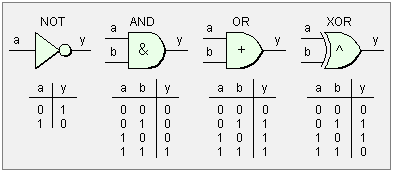

Image Source: https://www.eetimes.com/document.asp?doc_id=1274508

More information can be found here: 
https://github.com/sushant-choudhary/learning_deep_learning/blob/master/hackerneuralnet.ipynb

In [9]:
class Unit:
    
    def __init__(self, value, grad):
        self.value=value
        self.grad=grad
        
class AddGate:
           
        def forward(self, input1, input2):
            self.input1=input1
            self.input2=input2
            self.output=Unit(input1.value+input2.value, 0.0)
            return(self.output)
            
        def backward(self):
            self.input1.grad += 1 * self.output.grad 
            self.input2.grad += 1 * self.output.grad 
            
class MultiplyGate:
        """
        Attributes not in constructor:
        input1: first gate that inputs into the multiply gate
        input2: second gate that inputs into the multiply gate
        output: the output version of the gate that goes as input elsewhere
        """
        
        def forward(self, input1, input2): #input1,input2 are also Units
            # store pointers to input gates:
            self.input1=input1
            self.input2=input2
            self.output=Unit(input1.value*input2.value, 0.0)
            return(self.output)
            
        #take the gradient in output and chain it with local gradients    
        def backward(self):
            self.input1.grad += self.input2.value * self.output.grad 
            self.input2.grad += self.input1.value * self.output.grad     
            
class SigmoidGate:
           
        def forward(self, input1):
            self.input1=input1
            self.output=Unit(1/(1+exp(-input1.value)), 0.0)
            return(self.output)
            
        def backward(self):
            self.input1.grad += (self.output.value*(1-self.output.value)) * self.output.grad

Having defined the gates and units, let us run the forward pass to generate output values:

In [10]:
# Forward Pass

x=Unit(-2,0)
y=Unit(5,0)
z=Unit(-4,0)

a=AddGate()
q=a.forward(x,y)

m=MultiplyGate()
f=m.forward(q,z)

print(f.value) #should come out to (-2 + 5)*-4 , i.e., -12

-12


Now let us run the backward pass to decipher the gradient df/dx:

In [11]:
# Backward Pass

f.grad=1
m.backward()
a.backward()
a.input1.grad

-4.0

## Create Sample Classification Dataset

sklearn has a sample datasets for classification. We will use make_moons method to create a sample dataset of two categories. 

{0, 1}


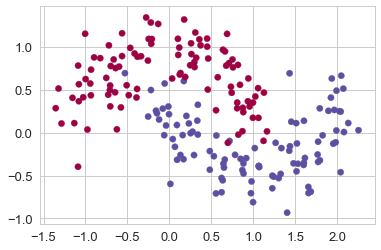

In [61]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
print(set(y))
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

## Helper function to render classifications

In [62]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

In [63]:
class SimpleNeuralNetwork():
    def __init__(self, input_neurons, hidden_neurons, output_neurons, activation='tanh'):
        
        # Initialize the parameters to random values. We need to learn these.
        np.random.seed(0)
        self.W1 = np.random.randn(input_neurons, hidden_neurons) / np.sqrt(input_neurons)
        self.b1 = np.zeros((1, hidden_neurons))
        self.W2 = np.random.randn(hidden_neurons, output_neurons) / np.sqrt(hidden_neurons)
        self.b2 = np.zeros((1, output_neurons))

        self.probs = []
        
        # This is what we return at the end
        self.model = {}
        self.activation = activation
           
     
    def fit(self, X, y, learning_rate=0.2, epsilon = 0.01, epochs=1000):
        
        # Gradient descent. For each batch...
        for i in range(0, epochs):

            # Forward propagation
            z1 = X.dot(self.W1) + self.b1
            
            if (self.activation == 'tanh'):
                a1 = tanh(z1)
            elif (self.activation == 'sigmoid'):
                a1 = sigmoid(z1)
            elif (self.activation == 'ReLU'):
                a1 = ReLu(z1)
            elif (self.activation == "softmax"):
                a1 = soft_max(z1)
            else:
                a1 = tanh(z1)

            z2 = a1.dot(self.W2) + self.b2
            exp_scores = np.exp(z2)
            self.probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

            # Backpropagation
            delta3 = self.probs
            delta3[range(len(X)), y] -= 1
            dW2 = (a1.T).dot(delta3)
            db2 = np.sum(delta3, axis=0, keepdims=True)
            delta2 = delta3.dot(self.W2.T) * (1 - np.power(a1, 2))
            dW1 = np.dot(X.T, delta2)
            db1 = np.sum(delta2, axis=0)

            # Add regularization terms (b1 and b2 don't have regularization terms)
            dW2 += reg_lambda * self.W2
            dW1 += reg_lambda * self.W1

            # Gradient descent parameter update
            self.W1 += -epsilon * dW1
            self.b1 += -epsilon * db1
            self.W2 += -epsilon * dW2
            self.b2 += -epsilon * db2
            
            # Assign new parameters to the model
            self.model = { 'W1': self.W1, 'b1': self.b1, 'W2': self.W2, 'b2': self.b2}

            # Optionally print the loss.
            # This is expensive because it uses the whole dataset, so we don't want to do it too often.
            if (i % 100) == 0:               
               print("Loss after iteration %i: %f" %(i, self.cross_entropy(X, y)))

        return self.model
        
    def predict(self,model, X):
        W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        return np.argmax(probs, axis=1)
    
    def cross_entropy(self, X, y):  
        W1, b1, W2, b2 = self.model['W1'], model['b1'], model['W2'], model['b2']
        # Forward propagation to calculate our predictions
        z1 = X.dot(self.W1) + self.b1
        a1 = np.tanh(z1)
        z2 = a1.dot(self.W2) + self.b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        # Calculating the loss
        correct_logprobs = -np.log(probs[range(len(X)), y])
        data_loss = np.sum(correct_logprobs)
        # Add regulatization term to loss (optional)
        data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
        return 1./len(X) * data_loss
   


Loss after iteration 0: 0.432401
Loss after iteration 100: 0.143131
Loss after iteration 200: 0.081577
Loss after iteration 300: 0.073252
Loss after iteration 400: 0.070619
Loss after iteration 500: 0.069262
Loss after iteration 600: 0.068413
Loss after iteration 700: 0.067830
Loss after iteration 800: 0.067405
Loss after iteration 900: 0.067081
{'W1': array([[ 2.91595989, -3.69633034,  3.15714019],
       [ 2.47226339,  0.70567219, -0.59310625]]), 'b1': array([[-2.09480575,  4.40433826,  1.12011929]]), 'W2': array([[ 4.39089795, -3.97363636],
       [ 4.23069472, -4.07011789],
       [-2.52654219,  3.36151185]]), 'b2': array([[-0.5916991,  0.5916991]])}


Text(0.5,1,'Decision Boundary for hidden layer with no. of neurons: 3')

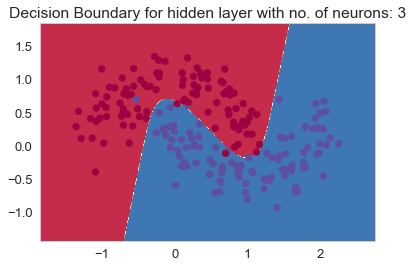

In [64]:
nn_input_dim = 2 # input layer dimensionality
nn_hidden_dim = 3 # neurons in the hidden layer
nn_output_dim = 2 # output layer dimensionality

# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength
learning_rate = 0.01
epochs = 1000

# Build a model with a 3-dimensional hidden layer
nn = SimpleNeuralNetwork(nn_input_dim, nn_hidden_dim, nn_output_dim)
model = nn.fit(X, y,learning_rate,epsilon, epochs)
print(model)

# Plot the decision boundary
plot_decision_boundary(lambda x: nn.predict(model, x))
plt.title("Decision Boundary for hidden layer with no. of neurons: 3")